# **Image Processing**

The purpose of image processing can be divided into five groups. Visualization: observe objects that are not visible. Image sharpening and restoration: to create a better image. Image retrieval: to seek for the image of interest. Measurement of pattern: to measure objects. And Image Recognition: to distinguish objects in an image.

scikit-image is an image processing library in Python that is easy to use. scikit-image makes use of Machine Learning with built-in functions, and can perform complex operations on images with just a few functions.


**Images in scikit-image**

There are some testing-purpose images provided by scikit-image, in a module called data. If we want to load a colored image of a rocket, we can do so by: Importing data from skimage. And then from data, call a method named rocket.


**RGB channels**

2-dimensional color images are often represented in RGB—3 layers of 2-dimensional arrays, where the three layers represent Red, Green and Blue channels of the image.


**Grayscaled images**

Grayscale images only have shades of black and white. Often, the grayscale intensity is stored as an 8-bit integer giving 256 possible different shades of gray. Grayscale images don't have any color information.


Notebook is designed to understand how images can be represented in numbers and how RED BLUE and GREEN colors are responsible for tranforming image.
If image is colorful it will be having 3 channels (RGB).Gray scale images will be having only single channel(white or black).



In [7]:
from skimage import data
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

**Read/Load images from skimage data module** 

In [32]:
#Load image
coffee_img=data.coffee()

#check size of the image
coffee_img.shape

(400, 600, 3)

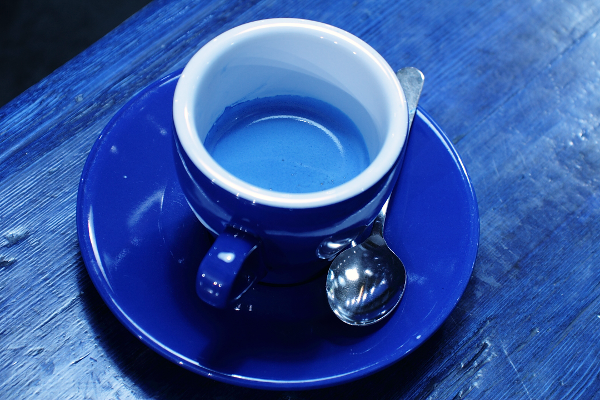

In [33]:
#Display image
cv2_imshow(coffee_img)

**RGB color distrinution for image**

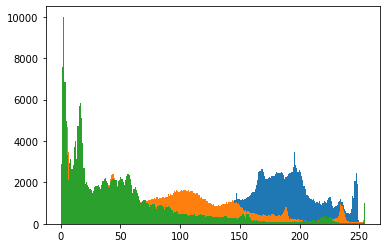

In [35]:
red=coffee_img[:,:,0]
green=coffee_img[:,:,1]
blue=coffee_img[:,:,2]

pr=plt.hist(red.ravel(),bins=256) #we need 256 values to show histogram as image pixel values ranges between 0 to 255
pg=plt.hist(green.ravel(),bins=256)
pb=plt.hist(blue.ravel(),bins=256)
plt.show()

**Use numpy library for Flipping the images**

Using numpy.flip() you can flip the NumPy array ndarray vertically (up / down) or horizontally (left / right). There are also numpy.flipud() specialized for vertical flipping and numpy.fliplr() specialized for horizontal flipping.

Ref:
https://note.nkmk.me/en/python-numpy-flip-flipud-fliplr/


In [36]:
import numpy as np

In [37]:
# Flip the image vertically
coffee_vertical_flip = np.flipud(coffee_img)

In [38]:
# Flip the previous image horizontally
seville_horizontal_flip = np.fliplr(coffee_vertical_flip)

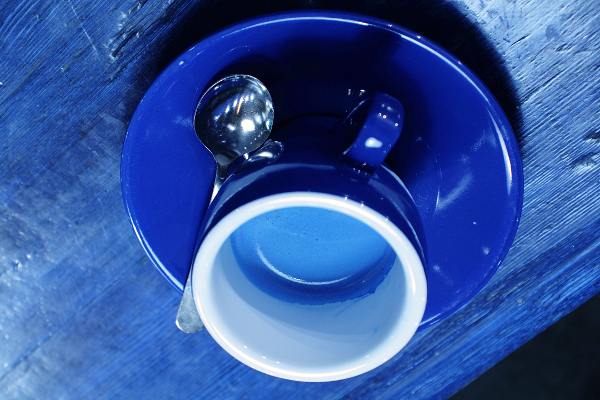

In [39]:
cv2_imshow(seville_horizontal_flip)

**Thresholding**

Partitioning an image into foreground and background by making it black and white.It is simplest method of image segmentation.

255(white) if pixel value > threshold 

0(black)   if pixel value < threshold


Categories of image thresholding:


1.   Global or histogram based: good when background is uniform
2.   local or adaptive : for uneven background illumination







In [40]:
from skimage.filters import try_all_threshold

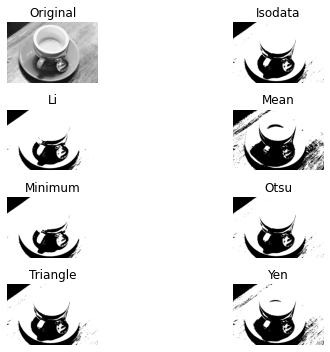

In [44]:
#obtain all thresholding images
fig,ax=try_all_threshold(coffee_img[:,:,0],verbose=False)

In [60]:
def show_image(image,title='Image',cmap_type='gray'):
  plt.imshow(image,cmap=cmap_type)
  plt.title(title)
  plt.axis("off")
  plt.show()

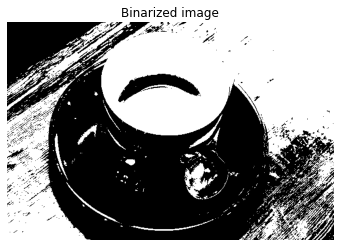

In [59]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
gray_tools_image = rgb2gray(coffee_img)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')
#cv2_imshow(binary_image)